In [1]:
import numpy as np
import torch

import os
# from vllm import LLM, SamplingParams
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Logits analysis 

In [ ]:
from tp_analysis import analyze_and_visualize_logits, compare_logprob_and_prob, calculate_error_metrics, analyze_divergence_tracking


## TP1 v.s. TP2

正在读取 result_detailed_tp1_run1.xlsx ...
正在读取 result_detailed_tp2_run1.xlsx ...


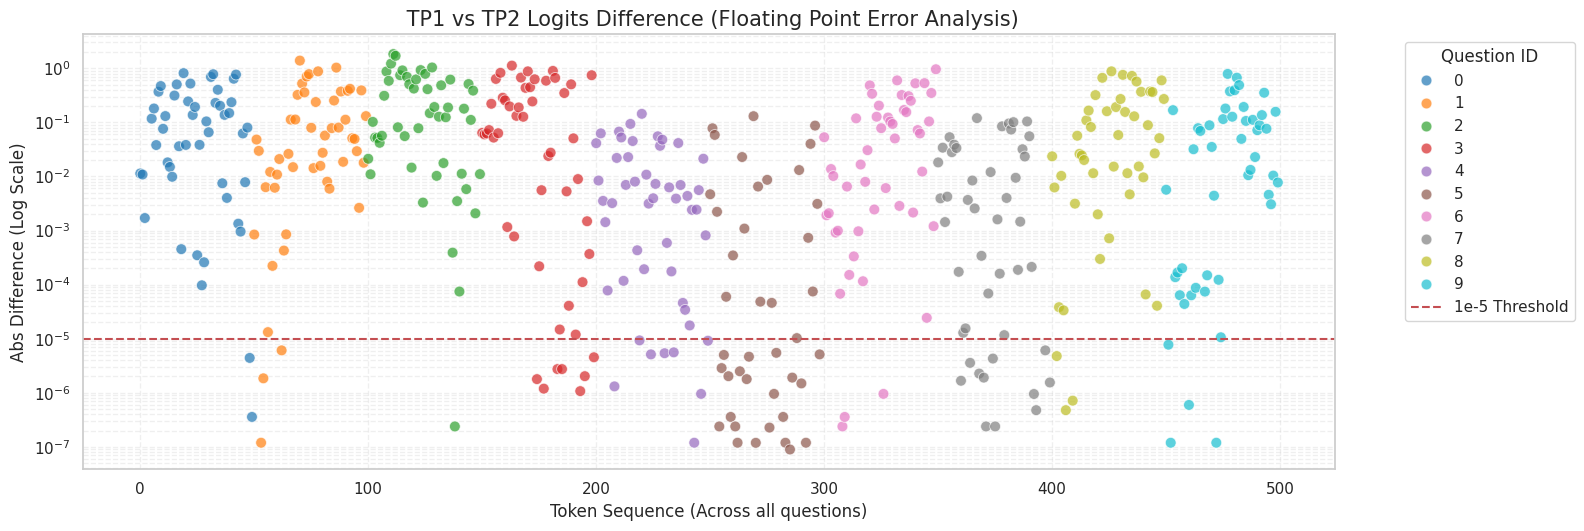

====== 📝 实验结果分析报告 ======
总计分析 Token 数: 500
最大 Logits 误差: 1.83e+00
平均 Logits 误差: 1.36e-01
------------------------------
⚠️ 警告: 发现 260 个 Token 发生了选择翻转 (Butterfly Effect)!
翻转详情 (前5个):
   Question_ID  Step_Index Top1_Text_TP1 Top1_Text_TP2  Logits_Diff
5            0           5            **            巴黎     0.117218
6            0           6            巴黎             （     0.180510
7            0           7            **         Paris     0.038083
8            0           8             （            ）。     0.369327
9            0           9         Paris            作为     0.469457


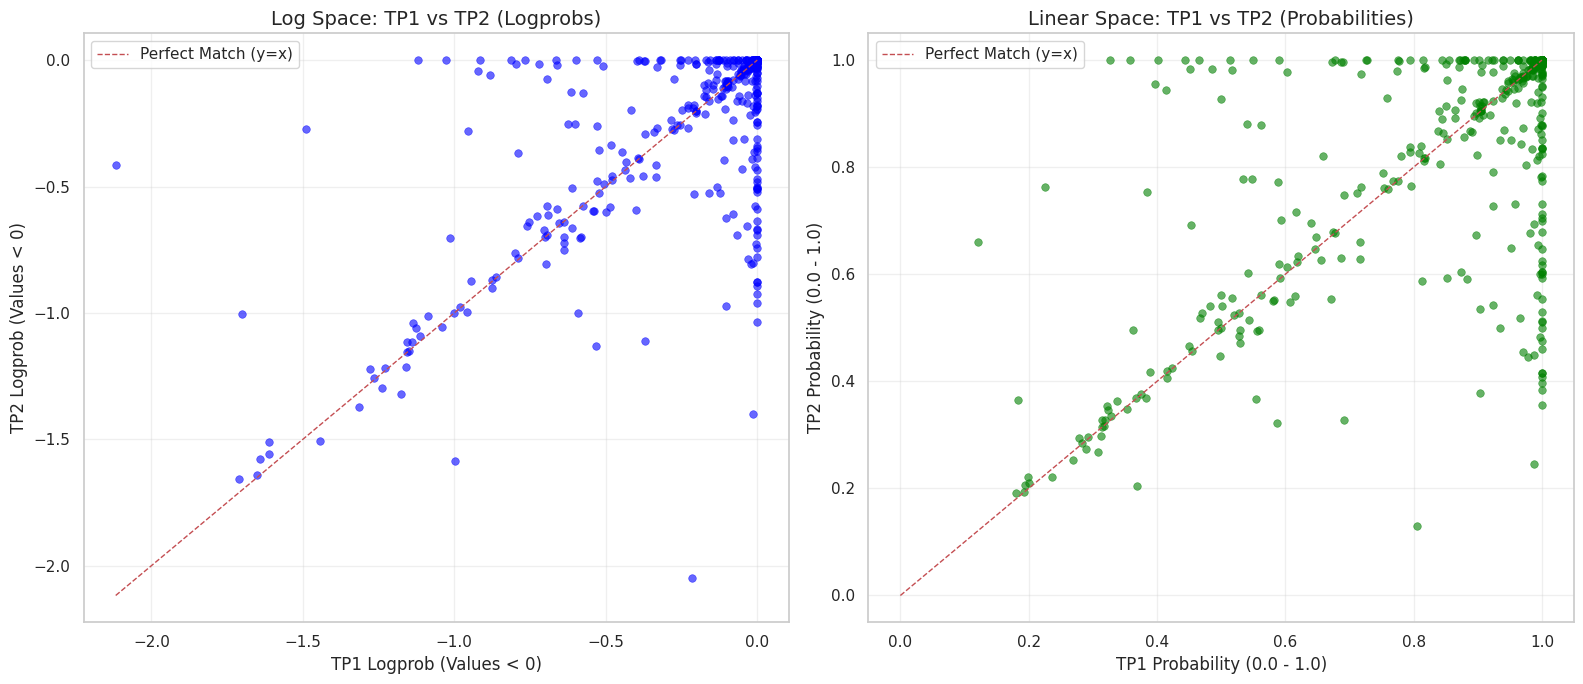

Logprob 相关系数: 0.68412835
Probability 相关系数: 0.65416271

====== 📉 误差统计分析 (Metrics) ======
MSE (Logprob空间):      8.40363e-02
MSE (Probability空间):  3.41545e-02
----------------------------------------
平均相对误差 (Probability): 14.171809%  (Max: 448.5799%)

====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======
ID: 2 | Token: 给出 | TP1_Prob: 0.1203 | TP2_Prob: 0.6599 | Err: 448.58%
ID: 2 | Token: 最后 | TP1_Prob: 0.2253 | TP2_Prob: 0.7625 | Err: 238.51%
ID: 3 | Token: 以下 | TP1_Prob: 0.3262 | TP2_Prob: 1.0000 | Err: 206.53%


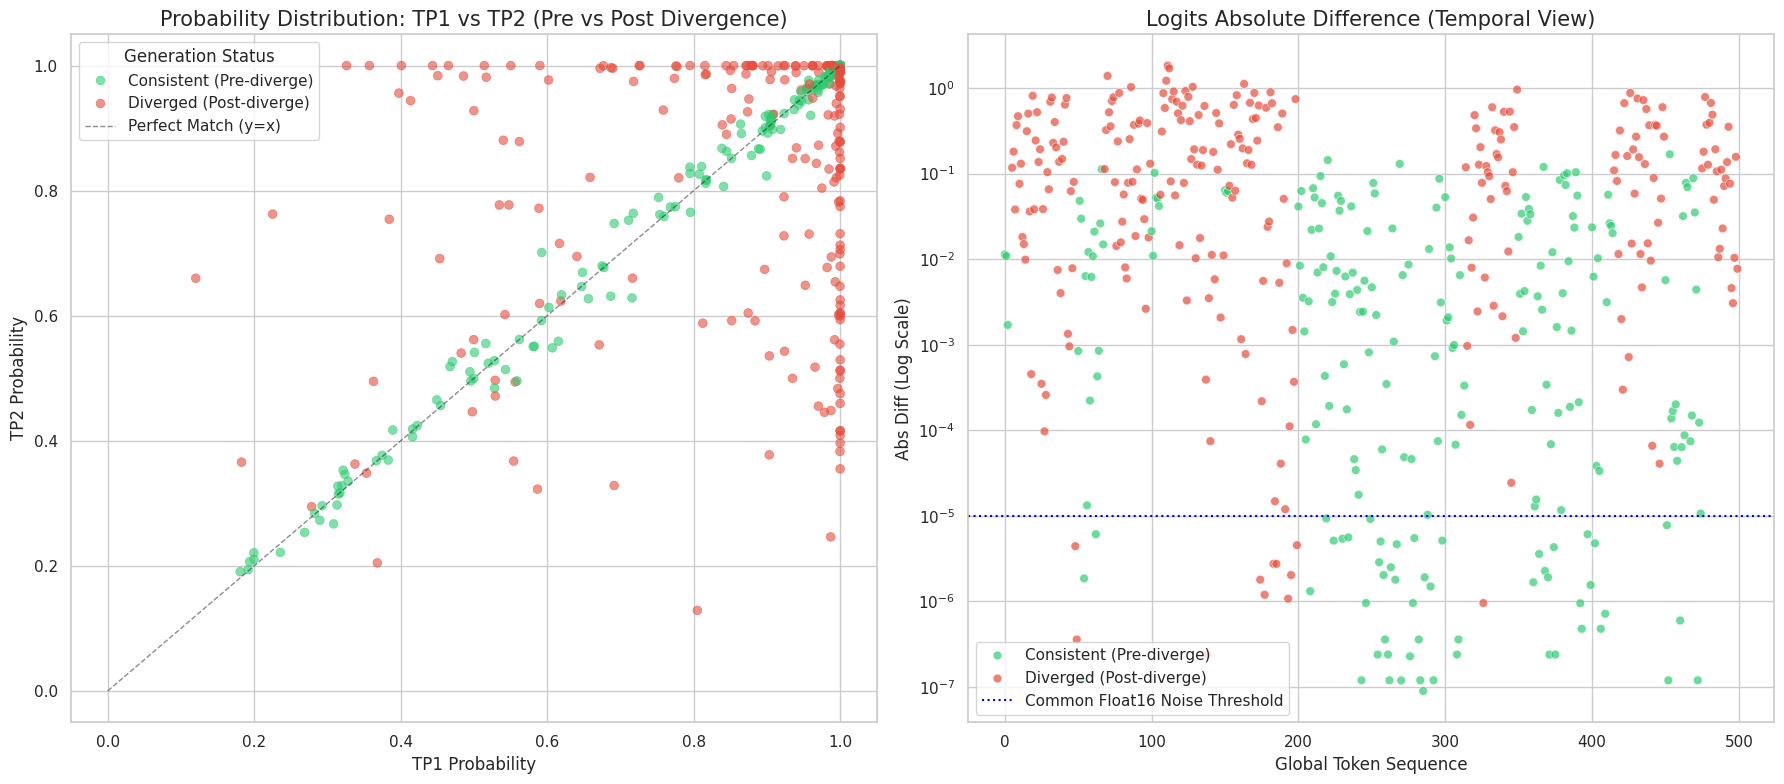

      ====== 📊 TP1 vs TP2 深度差异报告 ======      
总分析 Token 数: 500
发生路径偏离的 Token 数: 264 (占 52.80%)
--------------------------------------------------
【阶段 A: 路径一致时 (Consistent)】
 -> 平均 Logits 误差: 1.60e-02
 -> 最大 Logits 误差: 1.68e-01
 -> MSE (Probability): 3.64e-04

【阶段 B: 路径偏离后 (Diverged)】
 -> 平均 Logits 误差: 2.44e-01 (由于输入不同，误差天然变大)
 -> 路径偏离的首个 ID 示例:
            Top1_Text_TP1 Top1_Text_TP2  Logits_Diff
Question_ID                                         
0                      **            巴黎     0.117218
1                      涉及            复杂     0.112856
2                      保持            平衡     0.056598
3                     ###            当然     0.072071
6                      是指             是     0.118636
--------------------------------------------------


In [5]:
# === 1. 加载数据 ===
# 请确保文件名和你刚才生成的一致
file_tp1 = 'result_detailed_tp1_run1.xlsx'
file_tp2 = 'result_detailed_tp2_run1.xlsx'
# file_tp2 = 'result_detailed_tp4_run1.xlsx'

tp1_name = 'TP1'
tp2_name = 'TP2'

print(f"正在读取 {file_tp1} ...")
df_tp1 = pd.read_excel(file_tp1)
print(f"正在读取 {file_tp2} ...")
df_tp2 = pd.read_excel(file_tp2)

# 给列名加后缀，防止重名
# 我们主要对比 Top1 的数值，以及 Top1 的 Token ID 是否一致
suffix_tp1 = '_' + tp1_name
suffix_tp2 = '_' + tp2_name

# === 2. 数据对齐与合并 ===
# 我们按 Question_ID 和 Step_Index (第几个词) 进行对齐
merge_keys = ['Question_ID', 'Step_Index']
df_merged = pd.merge(
    df_tp1,
    df_tp2,
    on=merge_keys,
    suffixes=(suffix_tp1, suffix_tp2),
    how='inner'
)
analyze_and_visualize_logits(df_merged, tp1_name, tp2_name)
compare_logprob_and_prob(df_merged, tp1_name= tp1_name, tp2_name=tp2_name)
x = calculate_error_metrics(df_merged, tp1_name= tp1_name, tp2_name=tp2_name)
x = analyze_divergence_tracking(df_merged, tp1_name=tp1_name, tp2_name=tp2_name)

## TP2 v.s. TP4

正在读取 result_detailed_tp2_run1.xlsx ...
正在读取 result_detailed_tp4_run1.xlsx ...


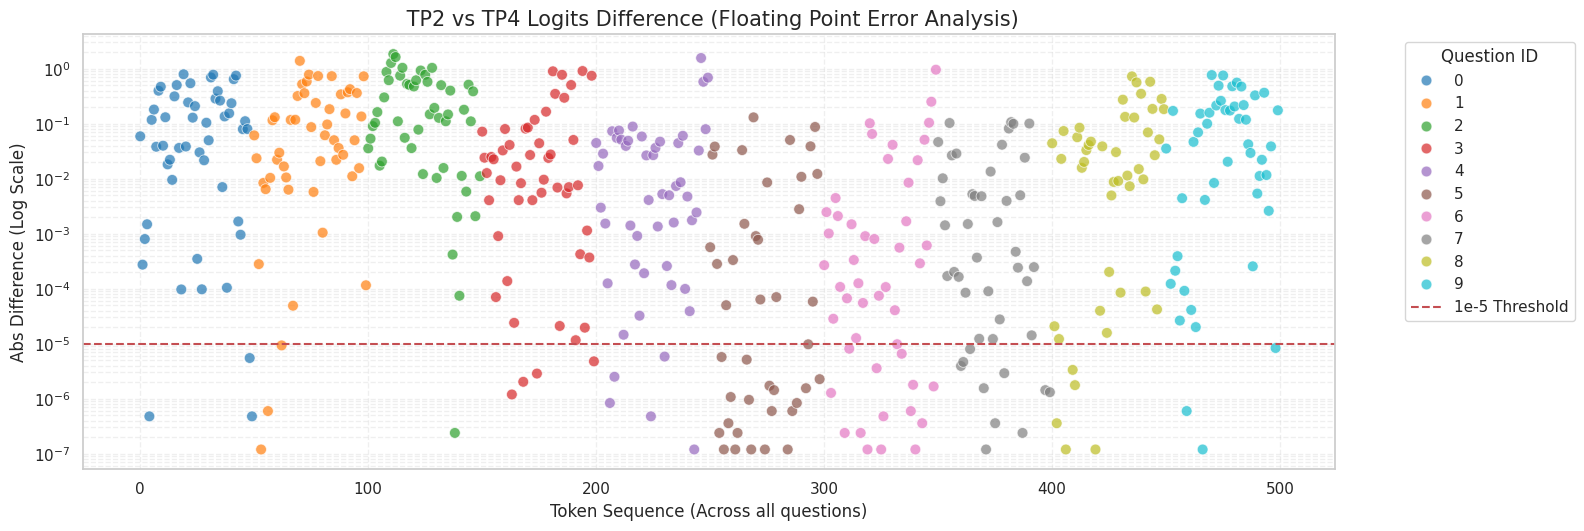

====== 📝 实验结果分析报告 ======
总计分析 Token 数: 500
最大 Logits 误差: 1.84e+00
平均 Logits 误差: 1.18e-01
------------------------------
⚠️ 警告: 发现 211 个 Token 发生了选择翻转 (Butterfly Effect)!
翻转详情 (前5个):
   Question_ID  Step_Index Top1_Text_TP2 Top1_Text_TP4  Logits_Diff
5            0           5            巴黎            **     0.117284
6            0           6             （            巴黎     0.180510
7            0           7         Paris            **     0.038095
8            0           8            ）。             （     0.397615
9            0           9            作为         Paris     0.469457


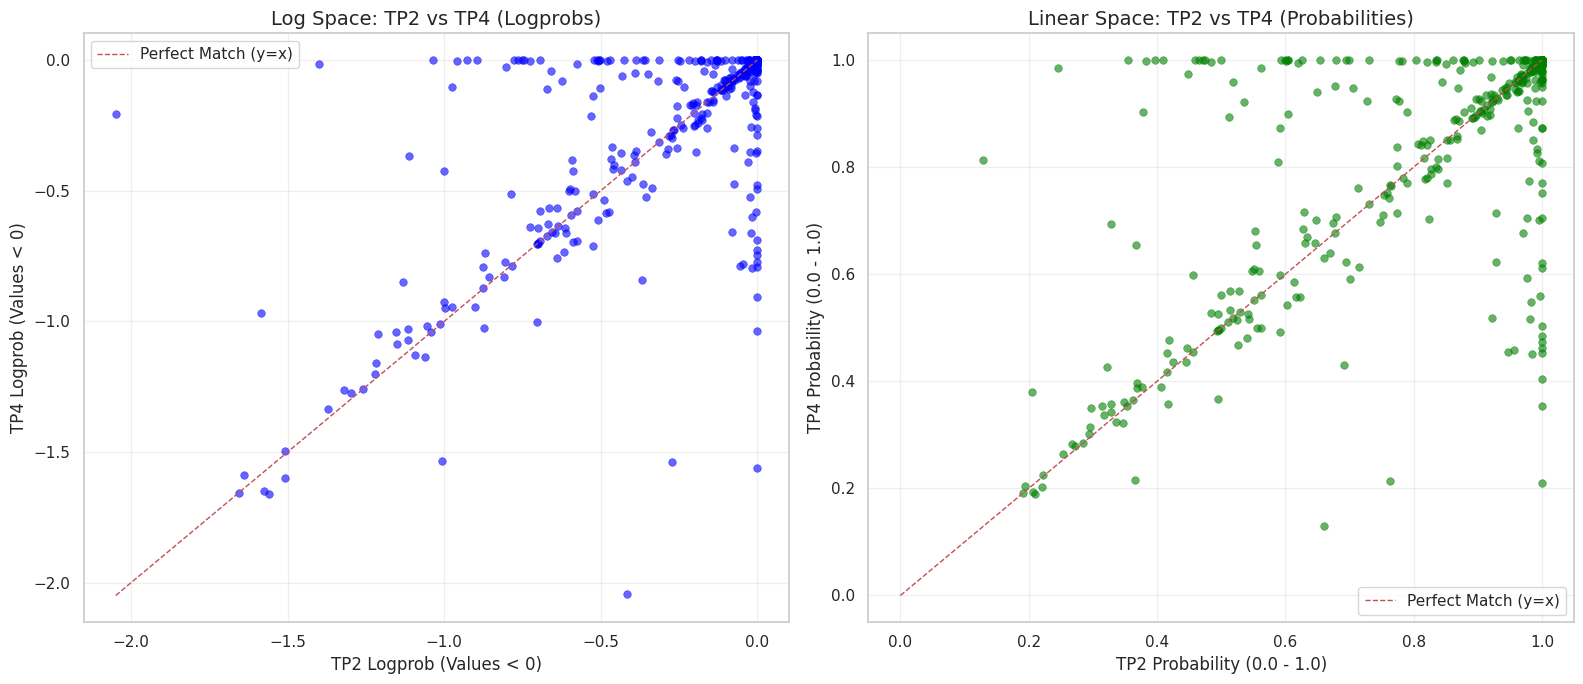

Logprob 相关系数: 0.71473672
Probability 相关系数: 0.70349175

====== 📉 误差统计分析 (Metrics) ======
MSE (Logprob空间):      7.55477e-02
MSE (Probability空间):  2.93509e-02
----------------------------------------
平均相对误差 (Probability): 13.465459%  (Max: 531.0045%)

====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======
ID: 2 | Token: 给出 | TP2_Prob: 0.1289 | TP4_Prob: 0.8131 | Err: 531.00%
ID: 1 | Token: 深刻 | TP2_Prob: 0.2464 | TP4_Prob: 0.9859 | Err: 300.15%
ID: 2 | Token: ：

 | TP2_Prob: 0.3552 | TP4_Prob: 1.0000 | Err: 181.54%


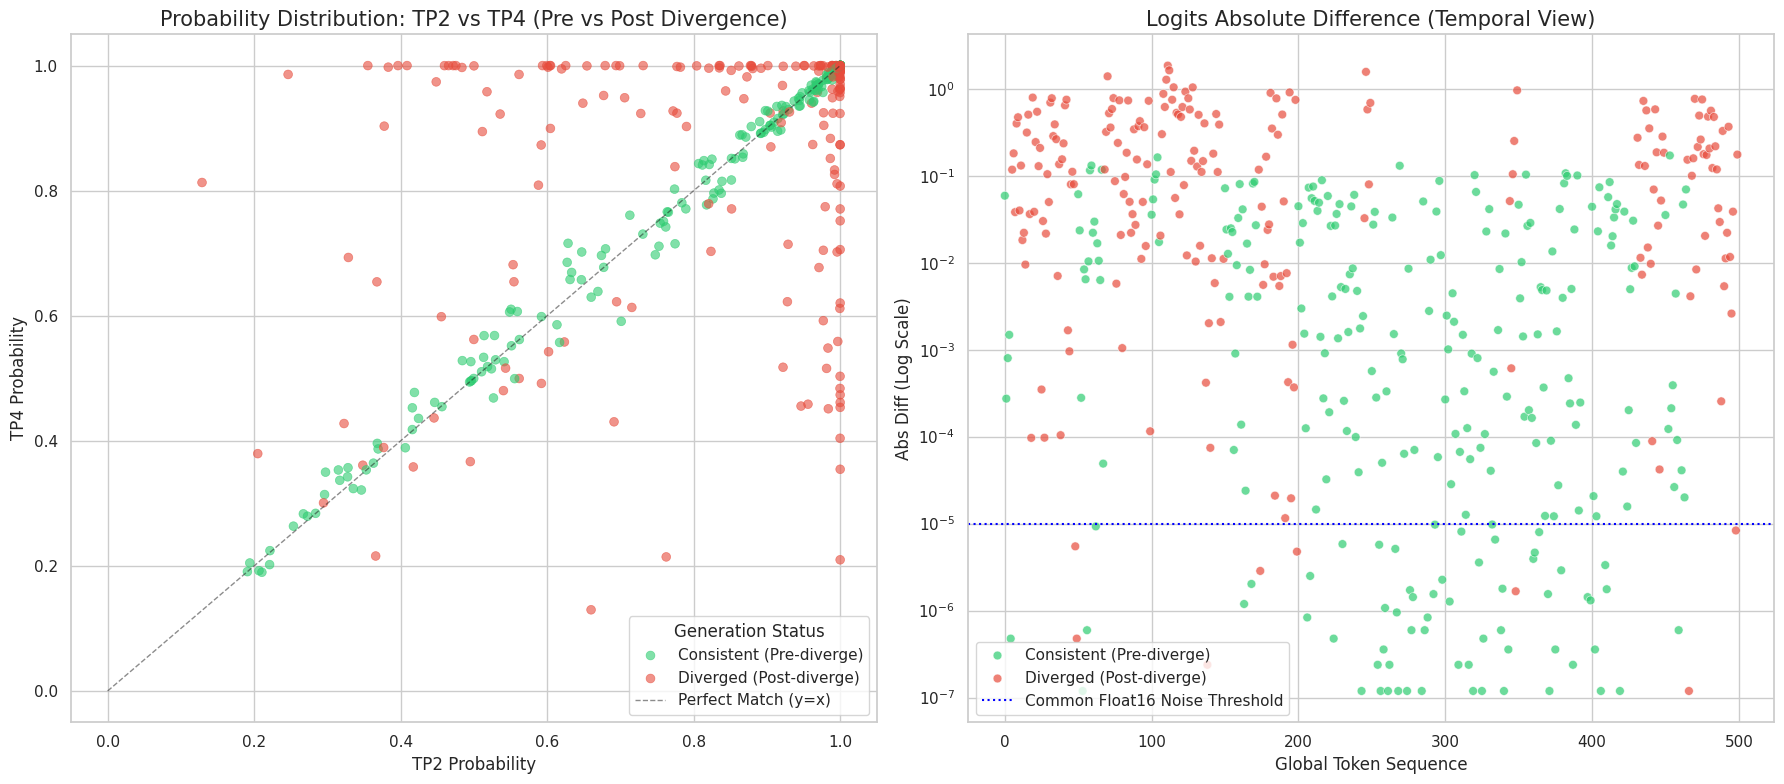

      ====== 📊 TP2 vs TP4 深度差异报告 ======      
总分析 Token 数: 500
发生路径偏离的 Token 数: 213 (占 42.60%)
--------------------------------------------------
【阶段 A: 路径一致时 (Consistent)】
 -> 平均 Logits 误差: 1.67e-02
 -> 最大 Logits 误差: 1.71e-01
 -> MSE (Probability): 3.75e-04

【阶段 B: 路径偏离后 (Diverged)】
 -> 平均 Logits 误差: 2.55e-01 (由于输入不同，误差天然变大)
 -> 路径偏离的首个 ID 示例:
            Top1_Text_TP2 Top1_Text_TP4  Logits_Diff
Question_ID                                         
0                      巴黎            **     0.117284
1                      复杂            涉及     0.117767
2                      平衡            保持     0.020472
3                      **        Python     0.117259
4                      情景            意境     0.032451
--------------------------------------------------


In [ ]:
# === 1. 加载数据 ===
# 请确保文件名和你刚才生成的一致
file_tp1 = 'result_detailed_tp2_run1.xlsx'
file_tp2 = 'result_detailed_tp4_run1.xlsx'

tp1_name = 'TP2'
tp2_name = 'TP4'

print(f"正在读取 {file_tp1} ...")
df_tp1 = pd.read_excel(file_tp1)
print(f"正在读取 {file_tp2} ...")
df_tp2 = pd.read_excel(file_tp2)

# 给列名加后缀，防止重名
# 我们主要对比 Top1 的数值，以及 Top1 的 Token ID 是否一致
suffix_tp1 = '_' + tp1_name
suffix_tp2 = '_' + tp2_name

# === 2. 数据对齐与合并 ===
# 我们按 Question_ID 和 Step_Index (第几个词) 进行对齐
merge_keys = ['Question_ID', 'Step_Index']
df_merged = pd.merge(
    df_tp1,
    df_tp2,
    on=merge_keys,
    suffixes=(suffix_tp1, suffix_tp2),
    how='inner'
)
analyze_and_visualize_logits(df_merged, tp1_name, tp2_name)
compare_logprob_and_prob(df_merged, tp1_name= tp1_name, tp2_name=tp2_name)
x = calculate_error_metrics(df_merged, tp1_name= tp1_name, tp2_name=tp2_name)
x = analyze_divergence_tracking(df_merged, tp1_name=tp1_name, tp2_name=tp2_name)

# Hidden states analysis

In [ ]:
from tp_analysis import load_debug_json, compare_tp_configs, plot_similarity_report


[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp1.json, 包含 50 个 Step 数据。
[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp2.json, 包含 50 个 Step 数据。
[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp4.json, 包含 50 个 Step 数据。


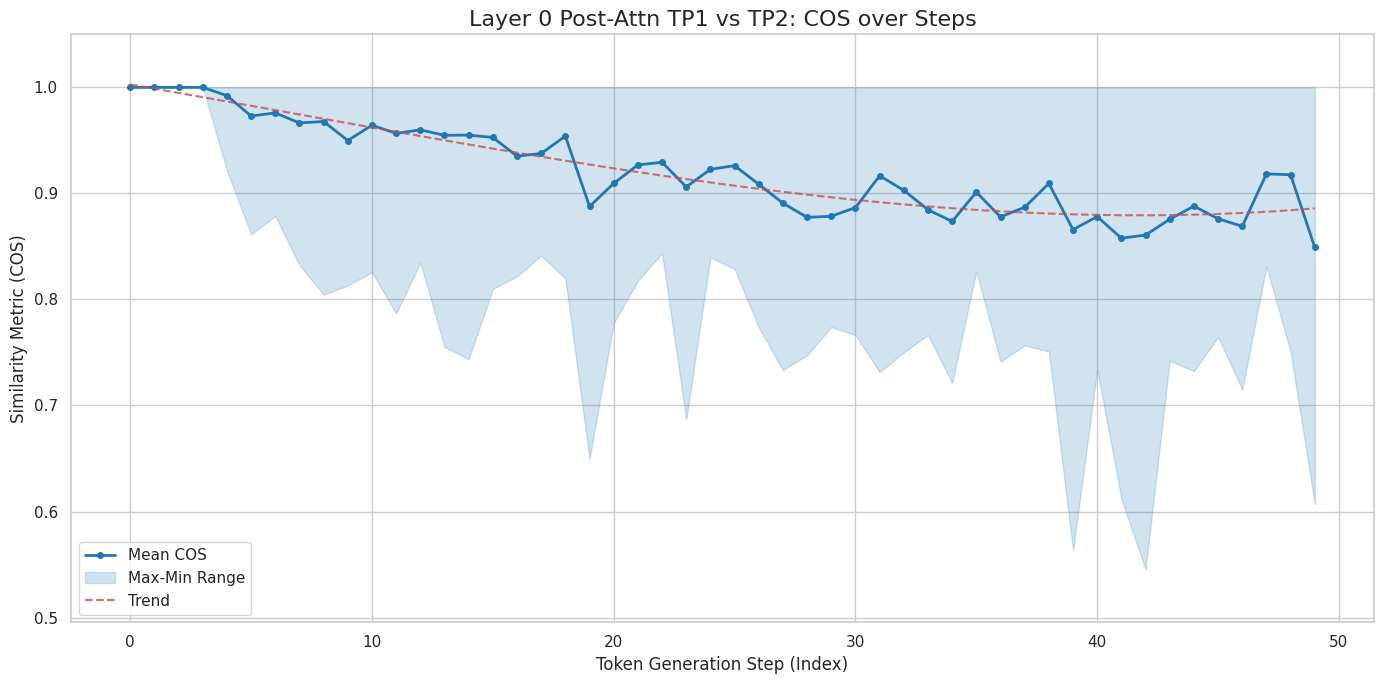

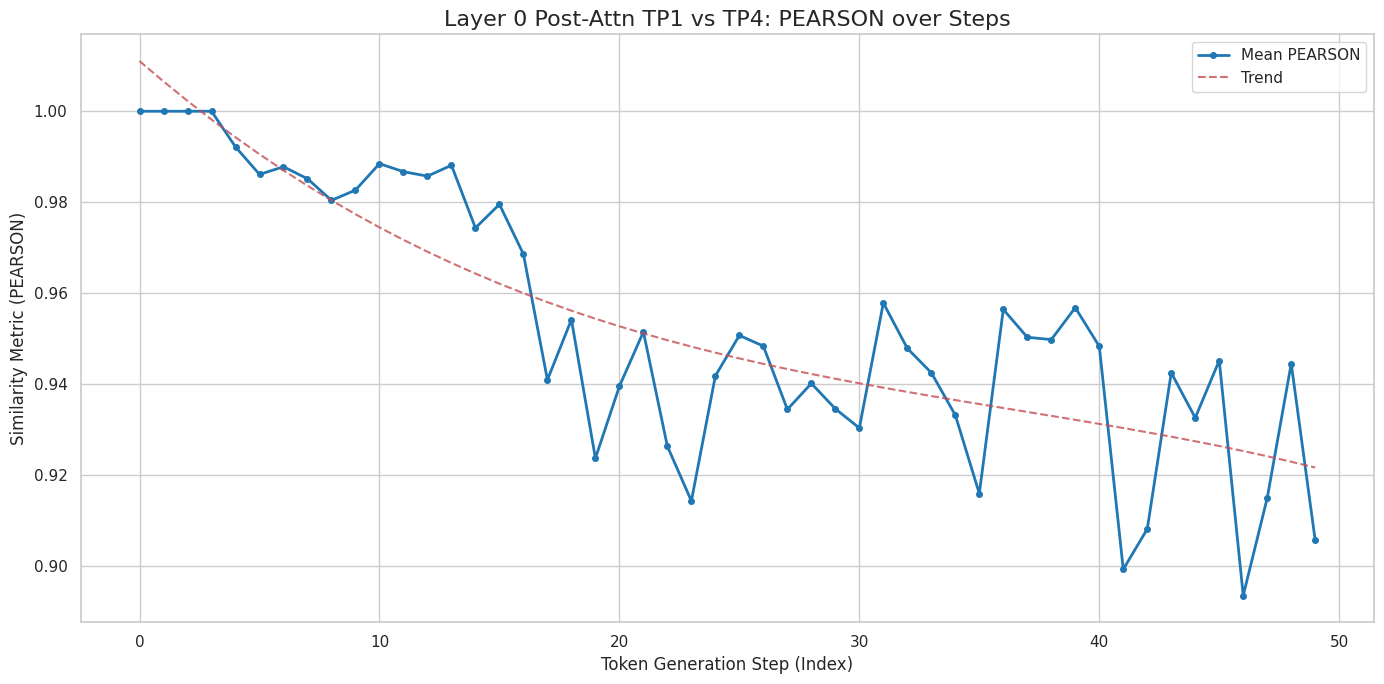

In [8]:
tp1_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp1.json')
tp2_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp2.json')
tp4_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp4.json')
report_df = compare_tp_configs(tp1_data, tp2_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP1 vs TP2", plot_min_max= True)


report_df = compare_tp_configs(tp1_data, tp4_data)
plot_similarity_report(report_df, metric_type='pearson', title="Layer 0 Post-Attn TP1 vs TP4", plot_min_max= False)



[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp1.json, 包含 50 个 Step 数据。
[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp2.json, 包含 50 个 Step 数据。
[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp4.json, 包含 50 个 Step 数据。


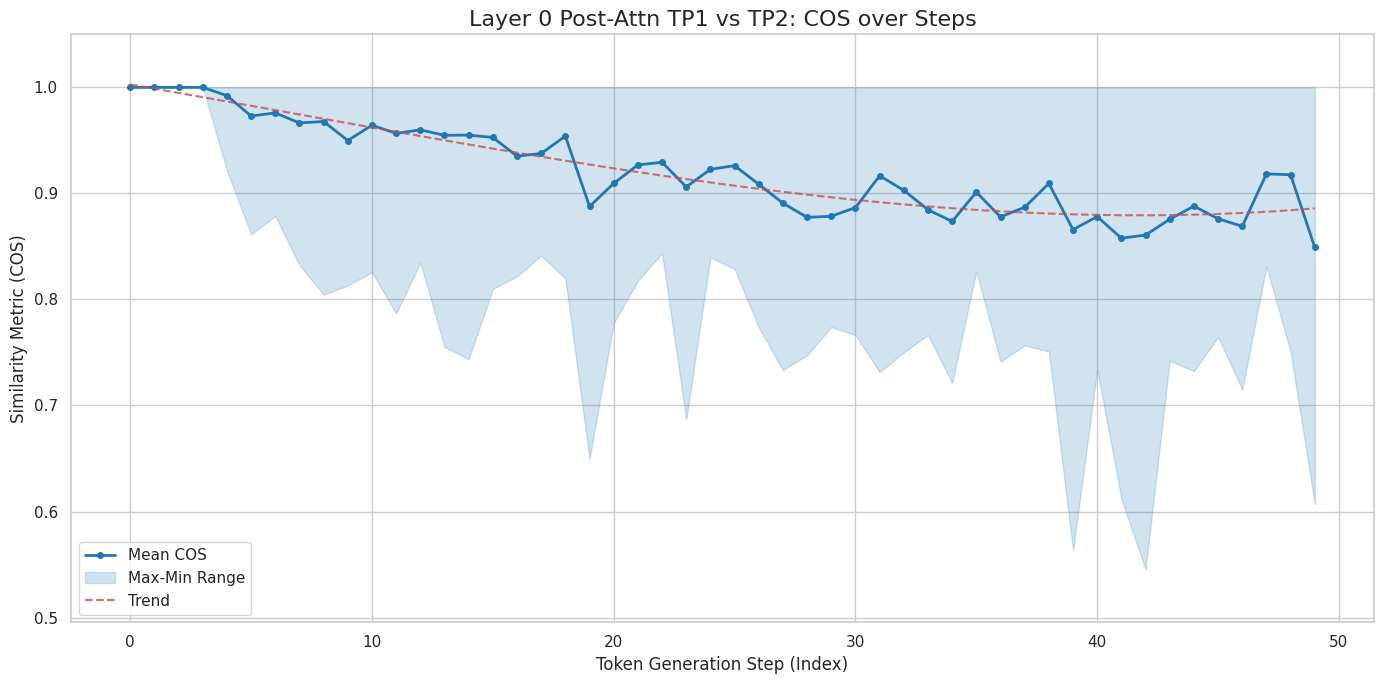

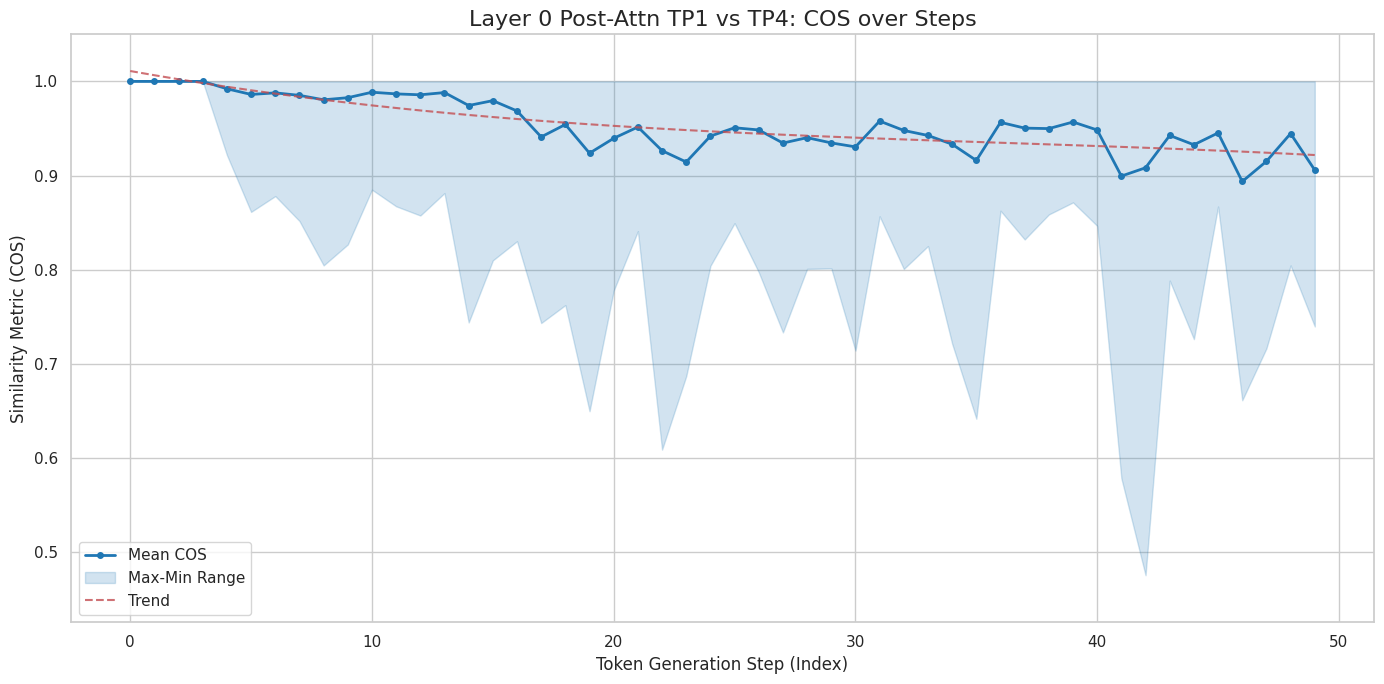

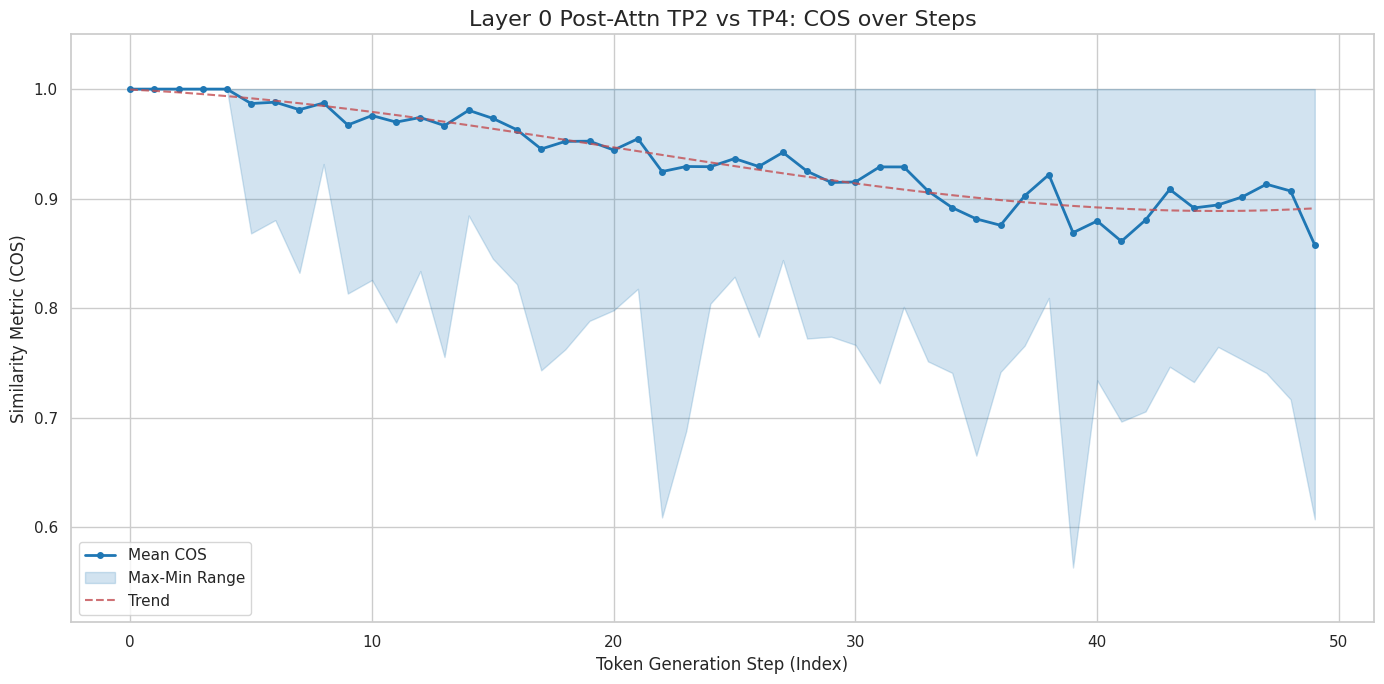

In [7]:
tp1_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp1.json')
tp2_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp2.json')
tp4_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp4.json')
report_df = compare_tp_configs(tp1_data, tp2_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP1 vs TP2", plot_min_max= True)


report_df = compare_tp_configs(tp1_data, tp4_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP1 vs TP4", plot_min_max= True)


report_df = compare_tp_configs(tp2_data, tp4_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP2 vs TP4", plot_min_max= True)